#Uygulama 3: K En Yakın Komşu Algoritması Uygulaması (k-NN) 

**Veri seti hakkında bilgi**<br>
"Breast Cancer Wisconsin (Diagnostic)" veri seti, birçok makine öğrenme algoritmasının test edilmesi için kullanılan yaygın bir veri setidir. Bu veri seti, Wisconsin Üniversitesi Tıbbi Okulu Patoloji Bölümü tarafından 1989-1990 yılları arasında toplanmıştir. Veri seti, 569 adet göğüs kanseri tümörünün 30 özelliğine ilişkin verileri içerir. Bu özellikler, tümörlerin fiziksel ölçümleri ve tekstürlerine ilişkin ölçümlerdir. Veri setinin hedef değişkeni "diagnosis" adlı değişkendir ve tümörlerin malign (zararlı) ya da benign (zararsız) olduğunu gösterir. Bu veri seti, makine öğrenme algoritmalarının nasıl uygulandığını anlamaya yardımcı olarak kullanılabilir.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Ön Hazırlık** 
*   Uyarıları kapatma

In [2]:
import warnings 
warnings.filterwarnings('ignore')

**1. Aşama: Veri Toplama**

In [3]:
import pandas as pd
df = pd.read_csv(
    "/content/drive/MyDrive/PythonileMakineOgrenmesi/VeriSetleri/breast_cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**2. Aşama: Veri Ön İşleme**

*   Girdi özellikleri ve hedef değişkeni (etiket) ayır

In [4]:
X = df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
        "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", 
        "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", 
        "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", 
        "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", 
        "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", 
        "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]

y = df["diagnosis"]

*   Veri setine dair istatistiki bilgilerin görüntülenmesi.

In [5]:
print(df.describe())
print(df.info())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

* Eğitim ve test verisini ayır.






In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Aşama: Model Oluşturma**

*   k-NN modelini tanımlama ve eğitme

In [7]:
#Model seçme
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#Modeli eğitme
knn.fit(X_train, y_train)

KNeighborsClassifier()

**4.Aşama : Modeli Test Etme**

*   Test verileri ile modeli değerlendirme.

In [8]:
from sklearn.metrics import accuracy_score
print("Eğitim verisi için doğruluk :", knn.score(X_train, y_train))
print("Test verisi için doğruluk   :", knn.score(X_test, y_test))

Eğitim verisi için doğruluk : 0.9406593406593406
Test verisi için doğruluk   : 0.956140350877193


*   Confusion Matrisi(Hata Matrisi) Tablo ve Grafik


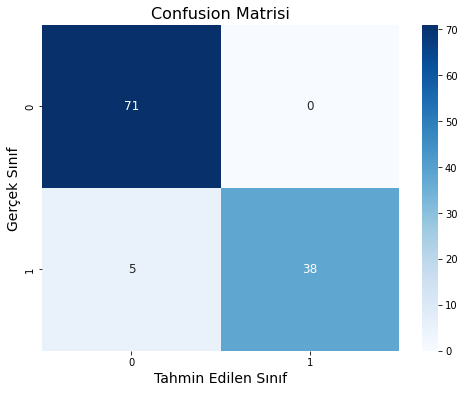

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion matrisini hesaplama
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Confusion matrisini görselleştirme 
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax, fmt='d', annot_kws={"size": 12})
ax.set_xlabel('Tahmin Edilen Sınıf', fontsize=14)
ax.set_ylabel('Gerçek Sınıf', fontsize=14)
ax.set_title('Confusion Matrisi', fontsize=16)
plt.show()

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      1.00      0.97        71
           M       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



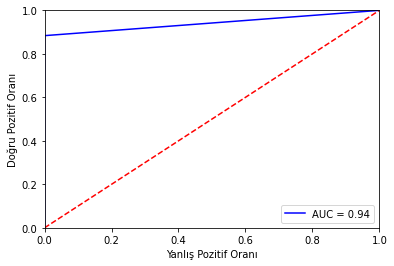

In [11]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# y_test ve y_pred dizilerinin kopyalarını oluşturalım
y_test_copy = y_test.copy()
y_pred_copy = y_pred.copy()

# y_test ve y_pred dizilerindeki etiketleri yeniden kodlayalım
y_test_copy[y_test_copy == 'M'] = 1
y_test_copy[y_test_copy == 'B'] = 0
y_pred_copy[y_pred_copy == 'M'] = 1
y_pred_copy[y_pred_copy == 'B'] = 0

# y_test ve y_pred dizilerini sayısal verilere dönüştürelim
y_test_copy = y_test_copy.astype(np.float32)
y_pred_copy = y_pred_copy.astype(np.float32)

# ROC eğrisi için fpr, tpr ve eşik değerlerini hesaplayalım
fpr, tpr, thresholds = roc_curve(y_test_copy, y_pred_copy)

# AUC (Area Under the Curve) değerini hesaplayalım
roc_auc = roc_auc_score(y_test_copy, y_pred_copy)

# ROC eğrisini çizelim
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Doğru Pozitif Oranı')
plt.xlabel('Yanlış Pozitif Oranı')
plt.show()

**5.Aşama : Modeli Yayma**

*   Modeli yayma, kullanma